In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_churn_dataset-testing-master.csv")

print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df.drop(columns=["CustomerID"], inplace=True)

In [ ]:
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]

for col in categorical_cols:
    df[col] = df[col].astype("category")

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [ ]:
num_cols = df.select_dtypes(include=['int64']).columns
print(num_cols)

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


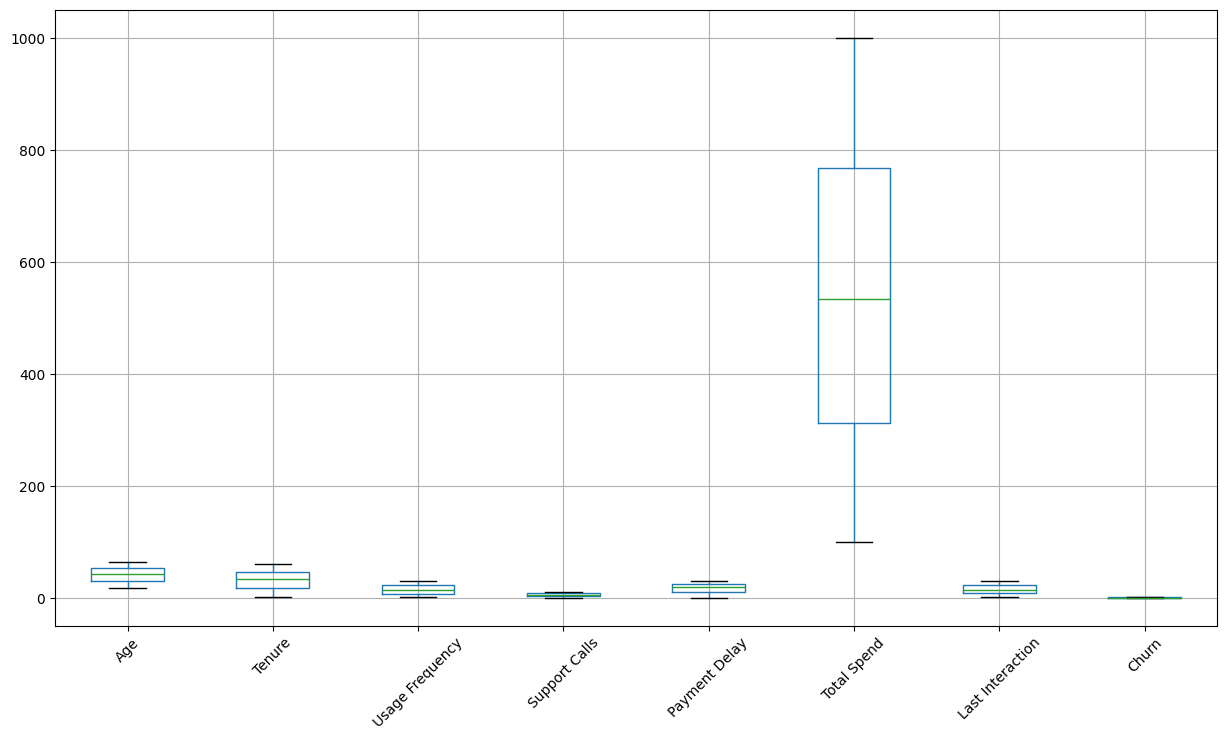

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Total spend

Q1 = df['Total Spend'].quantile(0.25)
Q3 = df['Total Spend'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Total Spend'] >= lower) & (df['Total Spend'] <= upper)]

In [ ]:
%%writefile categorical_encoding.py

print("File created successfully")

Writing categorical_encoding.py


In [ ]:
import categorical_encoding

File created successfully


In [ ]:
%%writefile categorical_encoding.py

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import category_encoders as ce


def one_hot_encoding(df, column):
    return pd.get_dummies(df, columns=[column], drop_first=True)


def label_encoding(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df


def ordinal_encoding(df, column):
    oe = OrdinalEncoder()
    df[column] = oe.fit_transform(df[[column]])
    return df


def frequency_encoding(df, column):
    freq = df[column].value_counts()
    df[column] = df[column].map(freq)
    return df


def target_encoding(df, column, target):
    encoder = ce.TargetEncoder(cols=[column])
    df[column] = encoder.fit_transform(df[column], df[target])
    return df

Overwriting categorical_encoding.py


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
import importlib
import categorical_encoding
importlib.reload(categorical_encoding)

<module 'categorical_encoding' from '/content/categorical_encoding.py'>

In [ ]:
df_onehot = categorical_encoding.one_hot_encoding(df.copy(), "Subscription Type")
df_onehot.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard
0,22,Female,25,14,4,27,Monthly,598,9,1,False,False
1,41,Female,28,28,7,13,Monthly,584,20,0,False,True
2,47,Male,27,10,2,29,Annual,757,21,0,True,False
3,35,Male,9,12,5,17,Quarterly,232,18,0,True,False
4,53,Female,58,24,9,2,Annual,533,18,0,False,True


In [21]:
df_label = categorical_encoding.label_encoding(df.copy(), "Gender")
df_label.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,Basic,Monthly,598,9,1
1,41,0,28,28,7,13,Standard,Monthly,584,20,0
2,47,1,27,10,2,29,Premium,Annual,757,21,0
3,35,1,9,12,5,17,Premium,Quarterly,232,18,0
4,53,0,58,24,9,2,Standard,Annual,533,18,0


In [22]:
df_ordinal = categorical_encoding.ordinal_encoding(df.copy(), "Contract Length")
df_ordinal.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,1.0,598,9,1
1,41,Female,28,28,7,13,Standard,1.0,584,20,0
2,47,Male,27,10,2,29,Premium,0.0,757,21,0
3,35,Male,9,12,5,17,Premium,2.0,232,18,0
4,53,Female,58,24,9,2,Standard,0.0,533,18,0


In [23]:
df_freq = categorical_encoding.frequency_encoding(df.copy(), "Subscription Type")
df_freq.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,21451,Monthly,598,9,1
1,41,Female,28,28,7,13,21502,Monthly,584,20,0
2,47,Male,27,10,2,29,21421,Annual,757,21,0
3,35,Male,9,12,5,17,21421,Quarterly,232,18,0
4,53,Female,58,24,9,2,21502,Annual,533,18,0


In [24]:
!pip install category_encoders

In [25]:
df_target = categorical_encoding.target_encoding(
    df.copy(),
    "Subscription Type",
    "Churn"
)
df_target.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,0.482775,Monthly,598,9,1
1,41,Female,28,28,7,13,0.473305,Monthly,584,20,0
2,47,Male,27,10,2,29,0.464964,Annual,757,21,0
3,35,Male,9,12,5,17,0.464964,Quarterly,232,18,0
4,53,Female,58,24,9,2,0.473305,Annual,533,18,0


In [26]:
%%writefile scaling.py

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, Normalizer, StandardScaler


def minmax_scaling(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df


def maxabs_scaling(df, columns):
    scaler = MaxAbsScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df


def vector_normalization(df, columns):
    scaler = Normalizer()
    df[columns] = scaler.fit_transform(df[columns])
    return df


def standard_scaling(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

Writing scaling.py


In [27]:
import scaling

In [28]:
num_cols = df.select_dtypes(include=['int64']).columns.drop("Churn")

In [29]:
df_minmax = scaling.minmax_scaling(df.copy(), num_cols)

In [30]:
df_maxabs = scaling.maxabs_scaling(df.copy(), num_cols)

In [31]:
df_normalized = scaling.vector_normalization(df.copy(), num_cols)

In [32]:
df_standard = scaling.standard_scaling(df.copy(), num_cols)

In [33]:
df.skew(numeric_only=True)

,0
Age,-0.040894
Tenure,-0.126056
Usage Frequency,0.037543
Support Calls,-0.192854
Payment Delay,-0.350714
Total Spend,0.047746
Last Interaction,0.005112
Churn,0.105408


In [34]:
import numpy as np

df["Total Spend"] = np.log1p(df["Total Spend"])

In [35]:
df["Total Spend"].skew()

np.float64(-0.7192419540387905)

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (51499, 10)
Testing Shape: (12875, 10)


In [37]:
%%writefile main.py

import pandas as pd
from categorical_encoding import *
from scaling import *

def main():
    # Load dataset
    df = pd.read_csv("customer_churn_dataset-testing-master.csv")

    print("Dataset Loaded Successfully")
    print("Shape:", df.shape)

    # Example: Apply Label Encoding
    df = label_encoding(df, "Gender")

    print("Encoding Applied Successfully")

    # Example: Standard Scaling
    num_cols = df.select_dtypes(include=['int64']).columns.drop("Churn")
    df = standard_scaling(df, num_cols)

    print("Scaling Applied Successfully")

    print("Preprocessing Completed")

if __name__ == "__main__":
    main()

Writing main.py


In [38]:
!python main.py

Dataset Loaded Successfully
Shape: (64374, 12)
Encoding Applied Successfully
Scaling Applied Successfully
Preprocessing Completed


In [39]:
from google.colab import files
files.download("categorical_encoding.py")
files.download("scaling.py")
files.download("main.py")
files.download("customer_churn_dataset-testing-master.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>